# Example

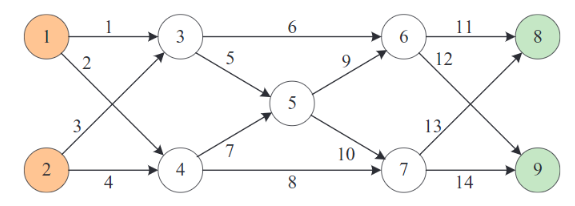

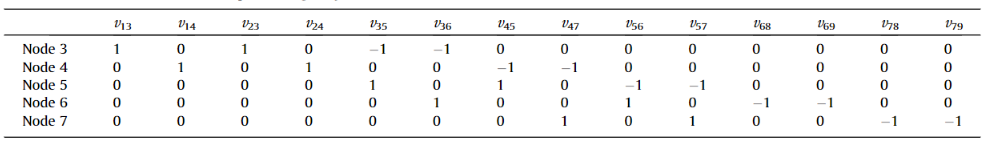

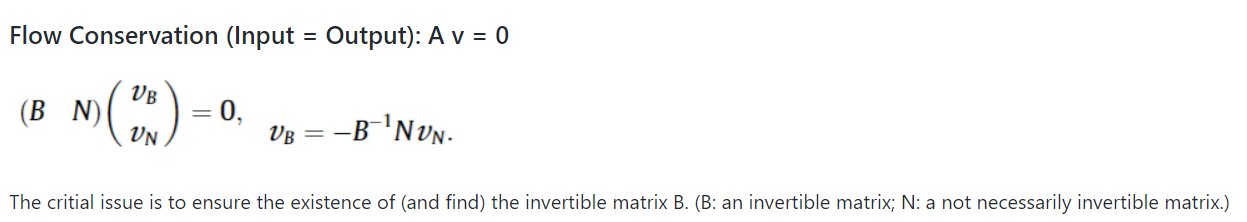

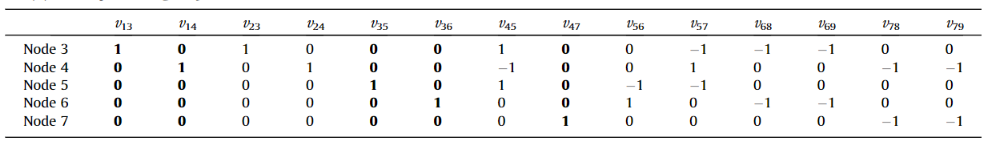

## The number of sensor is fixed after the network figure is given.   

The node-based method only optimize the location of sensor.  

## The constraint (B is an invertible matrix) is difficult to define. 

# Solution: 

Each flow conservation equation is only able to independently determine a single unobserved link flow. The fewer unobserved links involved in the flow conservation equation, the lower chance of accumulating measurement errors and uncertainty. So, the goal becomes to minimize the largest(model 1) or the cumulative number(model 2) of unobserved links connected to each non-centroid node.

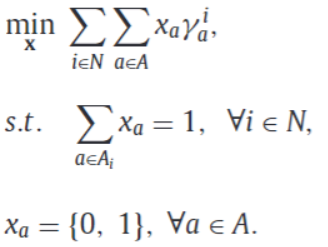

In [1]:
import numpy as np 
R = np.array([[1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
              [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1]])
R.shape

(5, 14)

x13 = 0
x14 = 0
x23 = 1
x24 = 1
x35 = 0
x36 = 0
x45 = 0
x47 = 0
x56 = 1
x57 = 0
x68 = 0
x69 = 0
x78 = 1
x79 = 0

np.array([x13, x14, x23, x24, x35, x36, x45, x47, x56, x57, x68, x69, x78, x79])

In [2]:
import pulp as pl
from pulp import *

num_solution = 0
solver = pl.getSolver('CPLEX_CMD')

# declare some variables
# each variable is a binary variable that is either 0 or 1

x13 = pl.LpVariable("x13", 0, 1, pl.LpInteger)
x14 = pl.LpVariable("x14", 0, 1, pl.LpInteger)
x23 = pl.LpVariable("x23", 0, 1, pl.LpInteger)
x24 = pl.LpVariable("x24", 0, 1, pl.LpInteger)
x35 = pl.LpVariable("x35", 0, 1, pl.LpInteger)
x36 = pl.LpVariable("x36", 0, 1, pl.LpInteger)
x45 = pl.LpVariable("x45", 0, 1, pl.LpInteger)
x47 = pl.LpVariable("x47", 0, 1, pl.LpInteger)
x56 = pl.LpVariable("x56", 0, 1, pl.LpInteger)
x57 = pl.LpVariable("x57", 0, 1, pl.LpInteger)
x68 = pl.LpVariable("x68", 0, 1, pl.LpInteger)
x69 = pl.LpVariable("x69", 0, 1, pl.LpInteger)
x78 = pl.LpVariable("x78", 0, 1, pl.LpInteger)
x79 = pl.LpVariable("x79", 0, 1, pl.LpInteger)

X = np.array([x13, x14, x23, x24, x35, x36, x45, x47, x56, x57, x68, x69, x78, x79]).reshape(14,1)

# define the problem
prob = pl.LpProblem("SensorLocation", pl.LpMinimize)   

# objective function - minimize value of objects 
prob += lpSum(([R[j][i] * X[i] for i in range(14)]) for j in range(5))            

# constraint - 
prob += x13 + x23 + x35 + x36 == 1             
prob += x14 + x24 + x45 + x47 == 1
prob += x56 + x57 == 1
prob += x68 + x69 == 1
prob += x78 + x79 == 1


while True:
    status = prob.solve()  # solve using the default solver, which is cbc
    print("Status:", pl.LpStatus[status])  # print the human-readable status
    
    
    if pl.LpStatus[status] == "Optimal":
        
        num_solution += 1
        i = 0
        xx = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
        for v in prob.variables():
            print(v.name, "=", v.varValue)
            if v.varValue == 1:
                xx[i] = 1
            i += 1
        prob += lpSum(X[i]*xx[i] for i in range(14)) <= 4.0
        print("Solution"+str(num_solution)+":",xx)   
        print("+-------+-------+-------+\n")
    
    else:
        break


Status: Optimal
x13 = 1.0
x14 = 1.0
x23 = 0.0
x24 = 0.0
x35 = 0.0
x36 = 0.0
x45 = 0.0
x47 = 0.0
x56 = 1.0
x57 = 0.0
x68 = 1.0
x69 = 0.0
x78 = 1.0
x79 = 0.0
Solution1: [1 1 0 0 0 0 0 0 1 0 1 0 1 0]
+-------+-------+-------+

Status: Optimal
x13 = 0.0
x14 = 0.0
x23 = 1.0
x24 = 1.0
x35 = 0.0
x36 = 0.0
x45 = 0.0
x47 = 0.0
x56 = 0.0
x57 = 1.0
x68 = 0.0
x69 = 1.0
x78 = 0.0
x79 = 1.0
Solution2: [0 0 1 1 0 0 0 0 0 1 0 1 0 1]
+-------+-------+-------+

Status: Optimal
x13 = 0.0
x14 = 1.0
x23 = 1.0
x24 = 0.0
x35 = 0.0
x36 = 0.0
x45 = 0.0
x47 = 0.0
x56 = 1.0
x57 = 0.0
x68 = 1.0
x69 = 0.0
x78 = 1.0
x79 = 0.0
Solution3: [0 1 1 0 0 0 0 0 1 0 1 0 1 0]
+-------+-------+-------+

Status: Optimal
x13 = 1.0
x14 = 0.0
x23 = 0.0
x24 = 1.0
x35 = 0.0
x36 = 0.0
x45 = 0.0
x47 = 0.0
x56 = 1.0
x57 = 0.0
x68 = 1.0
x69 = 0.0
x78 = 1.0
x79 = 0.0
Solution4: [1 0 0 1 0 0 0 0 1 0 1 0 1 0]
+-------+-------+-------+

Status: Optimal
x13 = 1.0
x14 = 0.0
x23 = 0.0
x24 = 1.0
x35 = 0.0
x36 = 0.0
x45 = 0.0
x47 = 0.0
x56 = 1.

Status: Optimal
x13 = 1.0
x14 = 0.0
x23 = 0.0
x24 = 0.0
x35 = 0.0
x36 = 0.0
x45 = 0.0
x47 = 1.0
x56 = 0.0
x57 = 1.0
x68 = 0.0
x69 = 1.0
x78 = 0.0
x79 = 1.0
Solution38: [1 0 0 0 0 0 0 1 0 1 0 1 0 1]
+-------+-------+-------+

Status: Optimal
x13 = 0.0
x14 = 0.0
x23 = 1.0
x24 = 0.0
x35 = 0.0
x36 = 0.0
x45 = 0.0
x47 = 1.0
x56 = 0.0
x57 = 1.0
x68 = 0.0
x69 = 1.0
x78 = 0.0
x79 = 1.0
Solution39: [0 0 1 0 0 0 0 1 0 1 0 1 0 1]
+-------+-------+-------+

Status: Optimal
x13 = 1.0
x14 = 0.0
x23 = 0.0
x24 = 0.0
x35 = 0.0
x36 = 0.0
x45 = 1.0
x47 = 0.0
x56 = 0.0
x57 = 1.0
x68 = 0.0
x69 = 1.0
x78 = 1.0
x79 = 0.0
Solution40: [1 0 0 0 0 0 1 0 0 1 0 1 1 0]
+-------+-------+-------+

Status: Optimal
x13 = 1.0
x14 = 0.0
x23 = 0.0
x24 = 0.0
x35 = 0.0
x36 = 0.0
x45 = 0.0
x47 = 1.0
x56 = 0.0
x57 = 1.0
x68 = 0.0
x69 = 1.0
x78 = 1.0
x79 = 0.0
Solution41: [1 0 0 0 0 0 0 1 0 1 0 1 1 0]
+-------+-------+-------+

Status: Optimal
x13 = 0.0
x14 = 0.0
x23 = 1.0
x24 = 0.0
x35 = 0.0
x36 = 0.0
x45 = 1.0
x47 = 0.0
x56 

Status: Optimal
x13 = 0.0
x14 = 0.0
x23 = 0.0
x24 = 1.0
x35 = 0.0
x36 = 1.0
x45 = 0.0
x47 = 0.0
x56 = 0.0
x57 = 1.0
x68 = 1.0
x69 = 0.0
x78 = 1.0
x79 = 0.0
Solution77: [0 0 0 1 0 1 0 0 0 1 1 0 1 0]
+-------+-------+-------+

Status: Optimal
x13 = 0.0
x14 = 1.0
x23 = 0.0
x24 = 0.0
x35 = 0.0
x36 = 1.0
x45 = 0.0
x47 = 0.0
x56 = 0.0
x57 = 1.0
x68 = 1.0
x69 = 0.0
x78 = 1.0
x79 = 0.0
Solution78: [0 1 0 0 0 1 0 0 0 1 1 0 1 0]
+-------+-------+-------+

Status: Optimal
x13 = 0.0
x14 = 0.0
x23 = 0.0
x24 = 1.0
x35 = 0.0
x36 = 1.0
x45 = 0.0
x47 = 0.0
x56 = 0.0
x57 = 1.0
x68 = 0.0
x69 = 1.0
x78 = 1.0
x79 = 0.0
Solution79: [0 0 0 1 0 1 0 0 0 1 0 1 1 0]
+-------+-------+-------+

Status: Optimal
x13 = 1.0
x14 = 0.0
x23 = 0.0
x24 = 0.0
x35 = 0.0
x36 = 0.0
x45 = 0.0
x47 = 1.0
x56 = 1.0
x57 = 0.0
x68 = 0.0
x69 = 1.0
x78 = 1.0
x79 = 0.0
Solution80: [1 0 0 0 0 0 0 1 1 0 0 1 1 0]
+-------+-------+-------+

Status: Optimal
x13 = 1.0
x14 = 0.0
x23 = 0.0
x24 = 0.0
x35 = 0.0
x36 = 0.0
x45 = 1.0
x47 = 0.0
x56 

Status: Optimal
x13 = 0.0
x14 = 0.0
x23 = 0.0
x24 = 0.0
x35 = 0.0
x36 = 1.0
x45 = 0.0
x47 = 1.0
x56 = 1.0
x57 = 0.0
x68 = 0.0
x69 = 1.0
x78 = 0.0
x79 = 1.0
Solution115: [0 0 0 0 0 1 0 1 1 0 0 1 0 1]
+-------+-------+-------+

Status: Optimal
x13 = 0.0
x14 = 0.0
x23 = 0.0
x24 = 0.0
x35 = 1.0
x36 = 0.0
x45 = 1.0
x47 = 0.0
x56 = 1.0
x57 = 0.0
x68 = 0.0
x69 = 1.0
x78 = 0.0
x79 = 1.0
Solution116: [0 0 0 0 1 0 1 0 1 0 0 1 0 1]
+-------+-------+-------+

Status: Optimal
x13 = 0.0
x14 = 0.0
x23 = 0.0
x24 = 0.0
x35 = 1.0
x36 = 0.0
x45 = 1.0
x47 = 0.0
x56 = 1.0
x57 = 0.0
x68 = 1.0
x69 = 0.0
x78 = 0.0
x79 = 1.0
Solution117: [0 0 0 0 1 0 1 0 1 0 1 0 0 1]
+-------+-------+-------+

Status: Optimal
x13 = 0.0
x14 = 0.0
x23 = 0.0
x24 = 0.0
x35 = 1.0
x36 = 0.0
x45 = 0.0
x47 = 1.0
x56 = 1.0
x57 = 0.0
x68 = 0.0
x69 = 1.0
x78 = 0.0
x79 = 1.0
Solution118: [0 0 0 0 1 0 0 1 1 0 0 1 0 1]
+-------+-------+-------+

Status: Optimal
x13 = 0.0
x14 = 0.0
x23 = 0.0
x24 = 0.0
x35 = 1.0
x36 = 0.0
x45 = 0.0
x47 = 1.0


# Note: Unfortunatelly, this algorithm just give us only one solution. 